In [192]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (20, 10)

epp = pd.read_csv('../data/ch.bfe.elektrizitaetsproduktionsanlagen/ElectricityProductionPlant.csv', parse_dates=['BeginningOfOperation']).set_index('xtf_id')
mainCat = pd.read_csv('../data/ch.bfe.elektrizitaetsproduktionsanlagen/MainCategoryCatalogue.csv').set_index('Catalogue_id')
subCat = pd.read_csv('../data/ch.bfe.elektrizitaetsproduktionsanlagen/SubCategoryCatalogue.csv').set_index('Catalogue_id')
plantCat = pd.read_csv('../data/ch.bfe.elektrizitaetsproduktionsanlagen/PlantCategoryCatalogue.csv').set_index('Catalogue_id')

lang='de'

epp = epp.merge(mainCat[lang].rename("MainCategoryName"),how='left', left_on='MainCategory', right_index=True)
epp = epp.merge(subCat[lang].rename("SubCategoryName"),how='left', left_on='SubCategory', right_index=True)
epp = epp.merge(plantCat[lang].rename("PlantCategoryName"),how='left', left_on='PlantCategory', right_index=True)

display(epp.head())

,Address,PostCode,Municipality,Canton,BeginningOfOperation,InitialPower,TotalPower,MainCategory,SubCategory,PlantCategory,_x,_y,MainCategoryName,SubCategoryName,PlantCategoryName
xtf_id,,,,,,,,,,,,,,,
5646,Rue des Creusets 41,1948,Fionnay,VS,1958-03-07,1872000.0,1872000.0,maincat_1,subcat_1,plantcat_6,2589880.0,1097661.0,Wasserkraft,Wasserkraft,Pumpspeicherkraftwerk
5686,Binenweg 5,3904,Naters,VS,1969-09-01,349576.0,349576.0,maincat_1,subcat_1,plantcat_7,2644115.0,1131390.0,Wasserkraft,Wasserkraft,Speicherkraftwerk
5726,Robbia 504G,7741,San Carlo,GR,1910-11-03,29150.0,29150.0,maincat_1,subcat_1,plantcat_2,2801863.0,1136379.0,Wasserkraft,Wasserkraft,Ausleitkraftwerk
5727,Via Principale 16,7744,Campocologno,GR,1907-03-01,55000.0,55000.0,maincat_1,subcat_1,plantcat_7,2808646.0,1123676.0,Wasserkraft,Wasserkraft,Speicherkraftwerk
5730,Büdemli 65B,7240,Küblis,GR,1922-01-01,44200.0,44200.0,maincat_1,subcat_1,plantcat_7,2778481.0,1198505.0,Wasserkraft,Wasserkraft,Speicherkraftwerk


In [193]:
totalPowerPerCategory = epp[epp['MainCategory'] == 'maincat_2'].groupby(['BeginningOfOperation'], as_index=False)['TotalPower' ].sum().sort_index().replace(np.nan, 0)
totalPowerPerCategory['BeginningOfOperationFloat'] = totalPowerPerCategory['BeginningOfOperation'].values.astype(float)
totalPowerPerCategory['Cumulative'] = totalPowerPerCategory['TotalPower'].cumsum()

In [220]:
sns.set_theme(color_codes=True)

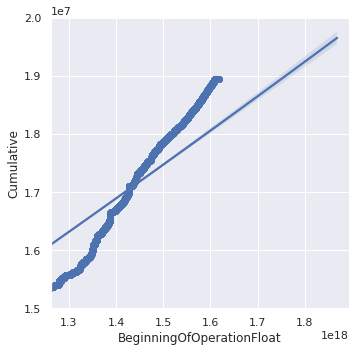

In [233]:

reg = sns.lmplot(x='BeginningOfOperationFloat', y='Cumulative', data=totalPowerPerCategory, order=2, truncate=False)
reg.set(xlim=(np.datetime64('2010-01-01', 'ns').astype(float),np.datetime64('2030-01-01', 'ns').astype(float)))
reg.set(ylim=(15000000,20000000))

In [246]:
totalPowerPerCategory = epp[(epp['MainCategory'] != 'maincat_3') & (epp['MainCategory'] != 'maincat_4')].groupby(['BeginningOfOperation', 'SubCategoryName'], as_index=False)['TotalPower' ].sum().sort_index().replace(np.nan, 0)
totalPowerPerCategory['BeginningOfOperationFloat'] = totalPowerPerCategory['BeginningOfOperation'].values.astype(float)
totalPowerPerCategory['Cumulative'] = totalPowerPerCategory['TotalPower'].cumsum()

In [247]:
totalPowerPerCategory

,BeginningOfOperation,SubCategoryName,TotalPower,BeginningOfOperationFloat,Cumulative
0,1863-01-01,Wasserkraft,200.00,-3.376598e+18,200.00
1,1886-01-01,Wasserkraft,740.00,-2.650752e+18,940.00
2,1888-01-01,Wasserkraft,360.00,-2.587680e+18,1300.00
3,1890-01-01,Wasserkraft,240.00,-2.524522e+18,1540.00
4,1891-01-01,Wasserkraft,5315.00,-2.492986e+18,6855.00
...,...,...,...,...,...
6885,2021-03-26,Photovoltaik,228.14,1.616717e+18,18949937.77
6886,2021-03-28,Photovoltaik,29.70,1.616890e+18,18949967.47
6887,2021-03-30,Photovoltaik,171.80,1.617062e+18,18950139.27
6888,2021-04-08,Photovoltaik,7.03,1.617840e+18,18950146.30


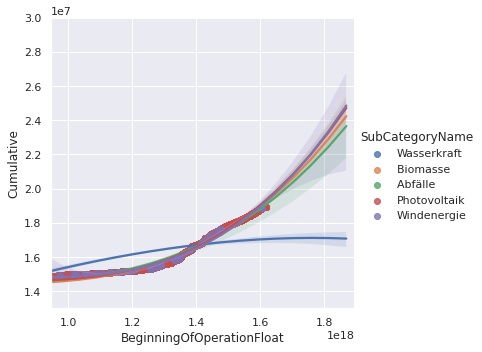

In [255]:
reg = sns.lmplot(x='BeginningOfOperationFloat', y='Cumulative', data=totalPowerPerCategory, hue='SubCategoryName', order=3, truncate=False)
reg.set(xlim=(np.datetime64('2000-01-01', 'ns').astype(float),np.datetime64('2030-01-01', 'ns').astype(float)))
reg.set(ylim=(1.3*1e7,30000000))

In [179]:
mainCat

,de,fr,it,en
Catalogue_id,,,,
maincat_1,Wasserkraft,Énergie hydraulique,Forza idrica,Hydroelectric power
maincat_2,Übrige erneuerbare Energien,Autres énergies renouvelables,Altre energie rinnovabili,Other renewable energies
maincat_3,Kernenergie,Énergie nucléaire,Energia nucleare,Nuclear energy
maincat_4,Fossile Energieträger,Agents énergétiques fossiles,Vettori energetici fossili,Fossil fuel
